Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

          no       0.29      0.29      0.29         7
         yes       0.62      0.62      0.62        13

    accuracy                           0.50        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.50      0.50      0.50        20



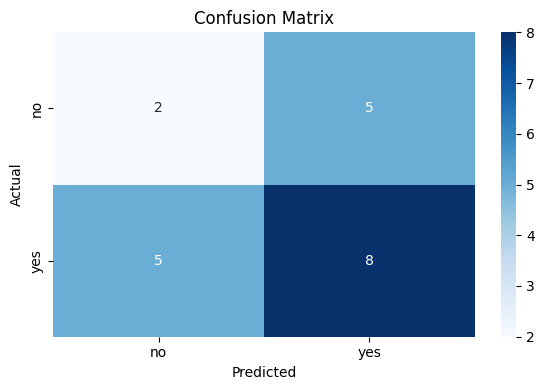

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("/content/online_learning.csv")

# Encode target labels
label_encoder = LabelEncoder()
df['completed'] = label_encoder.fit_transform(df['completed'])  # 'yes' -> 1, 'no' -> 0

# Features and target
X = df[['videos_watched', 'assignments_submitted', 'forum_posts']]
y = df['completed']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance with sample weights
class_weights = y_train.value_counts(normalize=True).to_dict()
sample_weights = y_train.map(lambda x: 1 / class_weights[x])

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train, sample_weight=sample_weights)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
